<a href="https://colab.research.google.com/github/MaryamMortazaviSefat/new/blob/main/q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#load data
!wget -q https://raw.githubusercontent.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/refs/heads/main/data_hoda.py
!wget -q https://github.com/MaryamMortazaviSefat/practice2_Prediction-of-Persian-Numbers/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from data_hoda import load_hoda
import random

In [3]:
x_train,y_train,x_test,y_test=load_hoda(size=25)

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [5]:
class Autoencoder(Model):
    def __init__(self, latent_dim, shape):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.shape = shape
        self.encoder = tf.keras.Sequential([
            layers.Flatten(),
            layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(np.prod(shape), activation='sigmoid'),
            layers.Reshape(shape)
        ])
        self.classifire = layers.Dense(10,activation='softmax')

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        classification=self.classifire(encoded)
        return decoded,classification

shape = (625,)
latent_dim = 2
autoencoder = Autoencoder(latent_dim, shape)


In [9]:
autoencoder.compile(optimizer='adam',
                    loss=['mse','sparse_categorical_crossentropy'],
                    metrics=[['mse','mae'],'accuracy'])

In [10]:
autoencoder.fit(x_train, [x_train,y_train],
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, [x_test,y_test]))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.0895 - loss: 2.5403 - mae: 0.4536 - mse: 0.2187 - val_accuracy: 0.1250 - val_loss: 2.5134 - val_mae: 0.4532 - val_mse: 0.2182
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1668 - loss: 2.4865 - mae: 0.4529 - mse: 0.2179 - val_accuracy: 0.0900 - val_loss: 2.4711 - val_mae: 0.4520 - val_mse: 0.2171
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1349 - loss: 2.4428 - mae: 0.4513 - mse: 0.2167 - val_accuracy: 0.1550 - val_loss: 2.4200 - val_mae: 0.4506 - val_mse: 0.2158
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1918 - loss: 2.3932 - mae: 0.4505 - mse: 0.2158 - val_accuracy: 0.1600 - val_loss: 2.3801 - val_mae: 0.4488 - val_mse: 0.2142
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2147 - loss: 2.3661 - mae: 0.4489 - mse: 0.2143 - val_accuracy: 0.1750 - val_loss: 2.3414 - val_mae: 0.4468 - val_mse: 0.2124
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accura

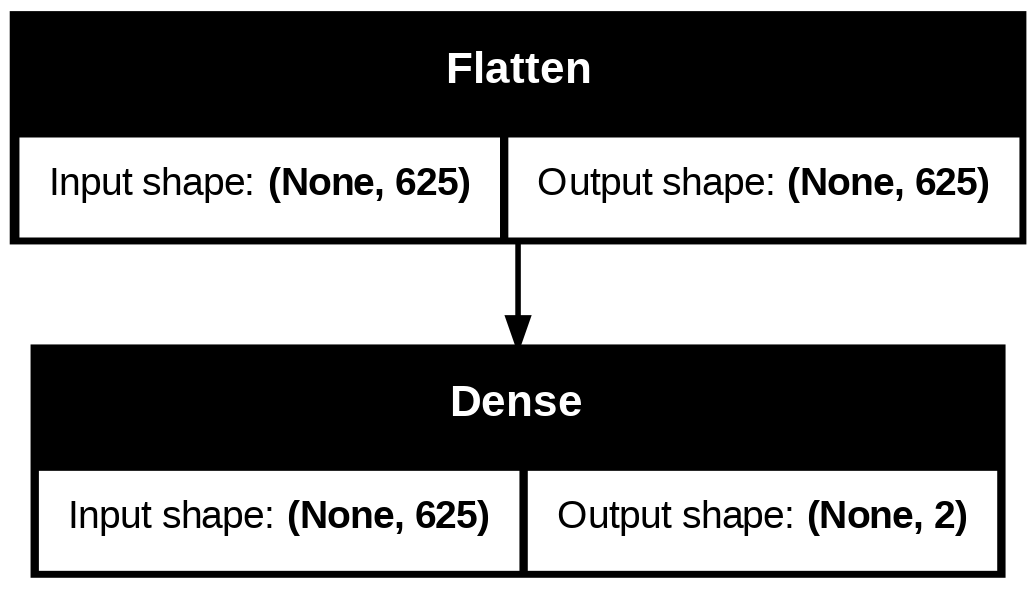

In [13]:
keras.utils.plot_model(autoencoder.encoder,show_shapes=True)

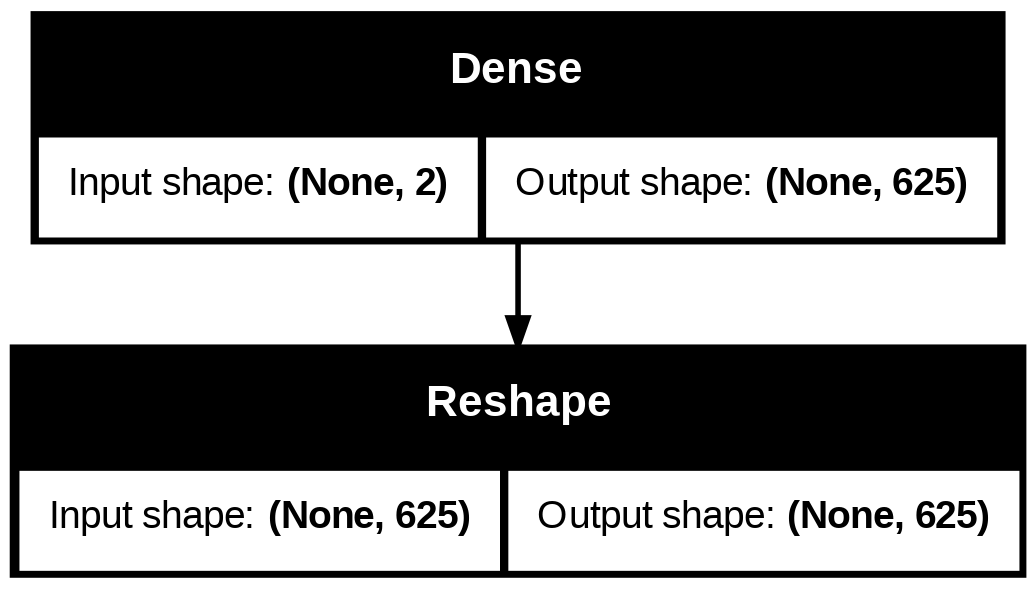

In [12]:
keras.utils.plot_model(autoencoder.decoder,show_shapes=True)

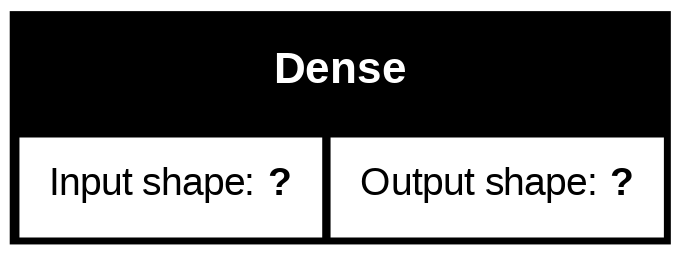

In [14]:
keras.utils.plot_model(autoencoder.classifire,show_shapes=True)

In [15]:
latent_space = autoencoder.encoder(x_test).numpy()

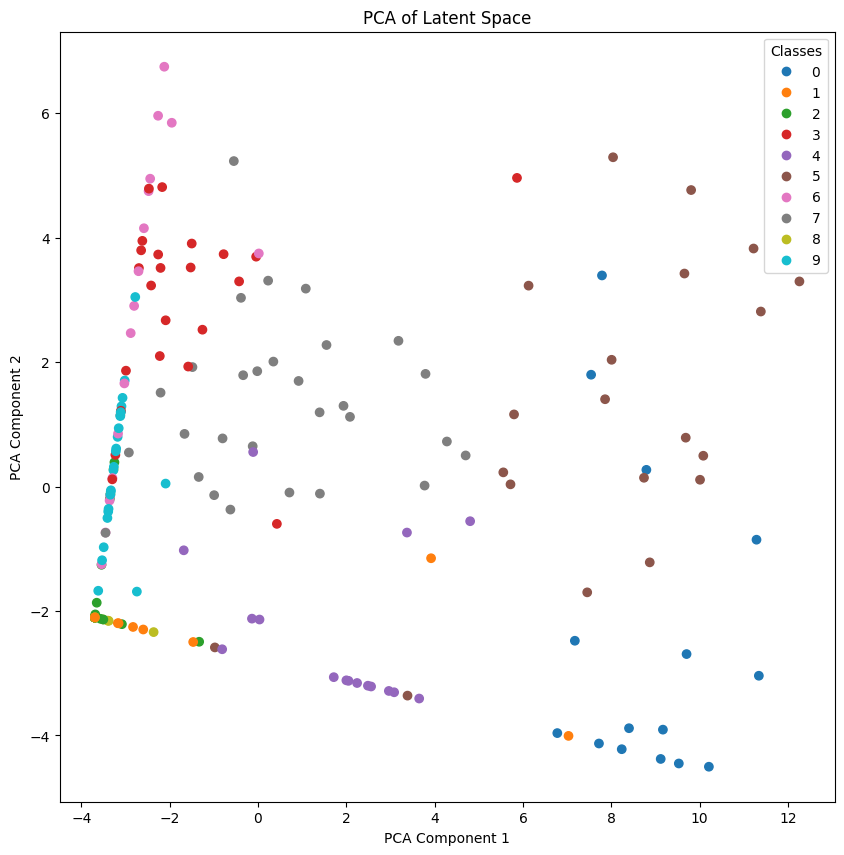

In [17]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_space)

# Visualize PCA results
plt.figure(figsize=(10, 10))
scatter = plt.scatter(latent_pca[:, 0], latent_pca[:, 1], c=y_test, cmap='tab10')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('PCA of Latent Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

چون پی سی ای  به فیچر های با اهمیت تر وزن بالاتر می دهد به وضوح در نمودار رنگ های مشابه نزدیک به هم قرار گرفتن